# Wie geht es POTUS?
Nach Bekanntgabe seiner Coronavirusinfektion ist der Geschundheitszustand des amerkanischen Präsidenten Doanld Trump Gegenstand wilder Spekulationen. Wir werden versuchen seinen körperlichen (😉) Gesundheitszustand anhand der Anzahl seiner Tweets zu analysieren. 

Hierzu lese wir zuerst die aktuellsten Tweets, die von dem Twitter-Account @realDonaldTrump gesendet wurden. 

In [1]:
import requests
from requests_oauthlib import OAuth1

API_KEY = '9OdY1QujoKPS6FreBpeh9OOJp'
API_SECRET = 'Zj8gX7lrbm5dWZLuonDeGfSpPTiyC3cDaaZ4AcPUV6XfuY140W'
ACCESS_TOKEN = '1215246349417009154-R9M9kJGKEao0gy6A97SlctU4tWQ6zD'
ACCESS_TOKEN_SECRET = 'L4B65dBZ9JHOR6q1GUVRJI0elUJWXGUYmHnRS4CVp27nR'

auth = OAuth1(API_KEY, API_SECRET, ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

twitter_name = "realDonaldTrump"

r = requests.get(f'https://api.twitter.com/1.1/statuses/user_timeline.json?screen_name={twitter_name}', auth=auth)
tweets = r.json()

Nachdem wir jetzt eine Liste von Tweets im JSON-Format haben, können wir anfangen, einfache Analysen durchzuführen. Schauen wir uns zuerst an, welche Daten in einem Tweet im JSON-Format enthalten sind.

In [2]:
import pprint

most_recent_tweet = tweets[0]
pprint.pprint(most_recent_tweet)

{'contributors': None,
 'coordinates': None,
 'created_at': 'Mon Oct 05 18:37:21 +0000 2020',
 'entities': {'hashtags': [],
              'symbols': [],
              'urls': [{'display_url': 'twitter.com/i/web/status/1…',
                        'expanded_url': 'https://twitter.com/i/web/status/1313186529058136070',
                        'indices': [117, 140],
                        'url': 'https://t.co/fFk0atUvqI'}],
              'user_mentions': []},
 'favorite_count': 260224,
 'favorited': False,
 'geo': None,
 'id': 1313186529058136070,
 'id_str': '1313186529058136070',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'place': None,
 'retweet_count': 67721,
 'retweeted': False,
 'source': '<a href="http://twitter.com/download/iphone" '
           'rel="nofollow">Twitter for iPhone</a>',
 'text': 'I will be leaving the g

Das ist leider etwas unübersichtlich. Lassen wir uns erst mal nur folgende Daten anzeigen:
- Text des Tweets
- Wann der Tweet gesendet wurde
- Von welchem Endgerät 
- Wie häufig der Tweet geliked oder retweeted wurde

In [3]:
print(f'Tweet-Text:        {most_recent_tweet["text"]}')
print(f'Datum und Uhrzeit: {most_recent_tweet["created_at"]}')
print(f'Endgerät:          {most_recent_tweet["source"]}')
print(f'Retweets:          {most_recent_tweet["retweet_count"]}')

Tweet-Text:        I will be leaving the great Walter Reed Medical Center today at 6:30 P.M. Feeling really good! Don’t be afraid of C… https://t.co/fFk0atUvqI
Datum und Uhrzeit: Mon Oct 05 18:37:21 +0000 2020
Endgerät:          <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
Retweets:          67721


Wenn wir das für einen Tweet machen können, geht das natürlich auch für eine Liste. So sieht das Ergebnis fürf die letzten 20 Tweets aus. 

In [4]:
def print_tweet(tweet):
    print(f'Tweet-Text:        {tweet["text"]}')
    print(f'Datum und Uhrzeit: {tweet["created_at"]}')
    print(f'Endgerät:          {tweet["source"]}')
    print(f'Retweets:          {tweet["retweet_count"]}')
    print()

for i in range(20):
    print_tweet(tweets[i])

Tweet-Text:        I will be leaving the great Walter Reed Medical Center today at 6:30 P.M. Feeling really good! Don’t be afraid of C… https://t.co/fFk0atUvqI
Datum und Uhrzeit: Mon Oct 05 18:37:21 +0000 2020
Endgerät:          <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
Retweets:          67721

Tweet-Text:        It is reported that the Media is upset because I got into a secure vehicle to say thank you to the many fans and su… https://t.co/vVn7X4eqqj
Datum und Uhrzeit: Mon Oct 05 18:26:30 +0000 2020
Endgerät:          <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
Retweets:          26304

Tweet-Text:        Exclusive Excerpt--Lewandowski &amp; Bossie: ‘Trump: America First: The President Succeeds Against All Odds’… https://t.co/afXOj5zYEW
Datum und Uhrzeit: Mon Oct 05 16:21:56 +0000 2020
Endgerät:          <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
Retweets:          

Als nächstes kombinieren wir alles, was wir bisher gelernt haben, um die 200 aktuellsten Tweets von Donald Trump zu bekommen.

In [5]:
import requests
import pprint
from requests_oauthlib import OAuth1

from functools import reduce

def authenticate():
    API_KEY = '9OdY1QujoKPS6FreBpeh9OOJp'
    API_SECRET = 'Zj8gX7lrbm5dWZLuonDeGfSpPTiyC3cDaaZ4AcPUV6XfuY140W'
    ACCESS_TOKEN = '1215246349417009154-R9M9kJGKEao0gy6A97SlctU4tWQ6zD'
    ACCESS_TOKEN_SECRET = 'L4B65dBZ9JHOR6q1GUVRJI0elUJWXGUYmHnRS4CVp27nR'

    return OAuth1(API_KEY, API_SECRET, ACCESS_TOKEN, ACCESS_TOKEN_SECRET)


def filter_tweets(tweets):
    return list(filter(lambda t: (t["is_quote_status"] == False) and ("retweeted_status" not in t), tweets))


def read_tweets(twitter_name="realDonaldTrump", filter_retweets=True, max_id = 0):
    auth = authenticate()

    if max_id == 0:
        r = requests.get(f'https://api.twitter.com/1.1/statuses/user_timeline.json?screen_name={twitter_name}&trim_user=t', auth=auth)
    else:
        r = requests.get(f'https://api.twitter.com/1.1/statuses/user_timeline.json?screen_name={twitter_name}&max_id={max_id}&trim_user=t', auth=auth)

    tweets = r.json()
    if filter_retweets:
        tweets = filter_tweets(tweets)

    return tweets

def min_tweet_id(tweets):
    return reduce(lambda id, t: t['id'] if t['id'] < id else id, tweets, tweets[0]['id'])

def read_n_recent_trump_tweets(n = 200, filter_retweets=True):
    recent_tweets = []
    max_id = 0
    while len(recent_tweets) < n:
        print("Recent Tweets size:" , len(recent_tweets))
        if len(recent_tweets) > 0:
            max_id = min_tweet_id(recent_tweets) - 1

        tweets = read_tweets(filter_retweets = filter_retweets, max_id = max_id)
        recent_tweets += (tweets)

    return recent_tweets[0:n]

recent_tweets = read_n_recent_trump_tweets(500, False)


Recent Tweets size: 0
Recent Tweets size: 1
Recent Tweets size: 1
Recent Tweets size: 1
Recent Tweets size: 1
Recent Tweets size: 21
Recent Tweets size: 21
Recent Tweets size: 21
Recent Tweets size: 21
Recent Tweets size: 21
Recent Tweets size: 21
Recent Tweets size: 21
Recent Tweets size: 21
Recent Tweets size: 21
Recent Tweets size: 41
Recent Tweets size: 61
Recent Tweets size: 61
Recent Tweets size: 81
Recent Tweets size: 81
Recent Tweets size: 81
Recent Tweets size: 81
Recent Tweets size: 101
Recent Tweets size: 121
Recent Tweets size: 141
Recent Tweets size: 161
Recent Tweets size: 161
Recent Tweets size: 161
Recent Tweets size: 161
Recent Tweets size: 161
Recent Tweets size: 161
Recent Tweets size: 161
Recent Tweets size: 161
Recent Tweets size: 161
Recent Tweets size: 181
Recent Tweets size: 181
Recent Tweets size: 181
Recent Tweets size: 201
Recent Tweets size: 201
Recent Tweets size: 201
Recent Tweets size: 201
Recent Tweets size: 221
Recent Tweets size: 221
Recent Tweets size

Nachdem wir jetzt 200 Tweets haben, können wir mit der Auswertung beginnen. Schauen wir uns zuerst einmal an. An welchen Tagen Donald Trump wie viele Tweets abgesetzt hat.

Hierzu benötigen wir eine Hilfsfunktion, die uns aus dem Zeitstempel des Tweets das Datum extrahiert.

In [6]:
from datetime import datetime

def convert_tweet_date(created_at):
    return datetime.strptime(created_at,'%a %b %d %H:%M:%S +0000 %Y').date().isoformat()

convert_tweet_date("Sun Oct 04 21:16:39 +0000 2020")

'2020-10-04'

In [7]:
from collections import Counter

for t in recent_tweets:
    t['date'] = convert_tweet_date(t['created_at'])

tweet_dates = [t['date'] for t in recent_tweets]
tweet_counter = dict(Counter(tweet_dates))
pprint.pprint(tweet_counter)


{'2020-09-22': 42,
 '2020-09-23': 48,
 '2020-09-24': 23,
 '2020-09-25': 84,
 '2020-09-26': 11,
 '2020-09-27': 46,
 '2020-09-28': 16,
 '2020-09-29': 36,
 '2020-09-30': 95,
 '2020-10-01': 60,
 '2020-10-02': 3,
 '2020-10-03': 4,
 '2020-10-04': 9,
 '2020-10-05': 23}


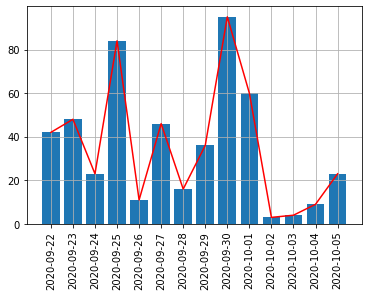

In [8]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

def sort_dates_ascending(tweet_counter):
    dates_ascending = sorted(tweet_counter.keys())
    tweet_count_ascending = [tweet_counter[d] for d in dates_ascending]   
    return dates_ascending, tweet_count_ascending

dates, count = sort_dates_ascending(tweet_counter)

plt.bar(dates,count)
lines = plt.plot(dates, count)
plt.setp(lines, color='r')


plt.xlabel='Datum' 
plt.ylabel='# Tweets'
plt.title='Wie geht es POTUS'
plt.xticks(rotation=90)

plt.grid()

plt.show()

Es scheint ja wieder aufwärts zu gehen am 5.10.2020. Schauen wir uns das mal im Detail an.

In [9]:
tweets_5_10 = filter(lambda t: t['date'] == "2020-10-05", recent_tweets)
for t in tweets_5_10:
    print(t['created_at'])

Mon Oct 05 18:37:21 +0000 2020
Mon Oct 05 18:26:30 +0000 2020
Mon Oct 05 16:21:56 +0000 2020
Mon Oct 05 15:17:47 +0000 2020
Mon Oct 05 12:08:17 +0000 2020
Mon Oct 05 11:14:48 +0000 2020
Mon Oct 05 11:12:53 +0000 2020
Mon Oct 05 11:10:26 +0000 2020
Mon Oct 05 11:08:34 +0000 2020
Mon Oct 05 11:07:04 +0000 2020
Mon Oct 05 11:05:18 +0000 2020
Mon Oct 05 11:04:00 +0000 2020
Mon Oct 05 11:02:03 +0000 2020
Mon Oct 05 11:00:58 +0000 2020
Mon Oct 05 10:57:40 +0000 2020
Mon Oct 05 10:54:07 +0000 2020
Mon Oct 05 10:51:46 +0000 2020
Mon Oct 05 10:50:40 +0000 2020
Mon Oct 05 10:49:08 +0000 2020
Mon Oct 05 10:47:44 +0000 2020
Mon Oct 05 10:45:34 +0000 2020
Mon Oct 05 10:30:25 +0000 2020
Mon Oct 05 10:19:05 +0000 2020
